**IST597 Assignment:- Build your own custom optimizer:- pgb5080@psu.edu**

In [ ]:
# Load Library
import os
import numpy as np
import pandas as pd
import time
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
from math import sqrt
np.random.seed(5080*7)
tf.random.set_seed(5080*7)

In [ ]:
# # Load Data
mnist = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Split Data

train_ratio = 0.80
validation_ratio = 0.10
test_ratio = 0.10

(X_train, y_train), (X_test, y_test) = mnist

X = np.concatenate([X_train, X_test])
y = np.concatenate([y_train, y_test])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=(1-train_ratio))
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=((test_ratio/(validation_ratio+test_ratio))))

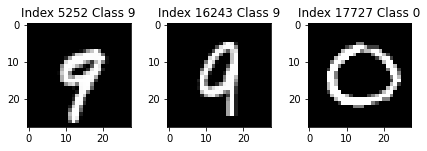

In [ ]:
# Display Sample Data

indices = list(np.random.randint(X_train.shape[0],size=3))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(X_train[indices[i]].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Index {} Class {}".format(indices[i], y_train[indices[i]]))
    plt.tight_layout()

In [ ]:
# Print Size
print("X_train Size:" + str(X_train.shape))
print("X_val Size:" + str(X_val.shape))
print("X_test Size:" + str(X_test.shape))

print("y_train Size:" + str(y_train.shape))
print("y_val Size:" + str(y_val.shape))
print("y_test Size:" + str(y_test.shape))

X_train Size:(56000, 28, 28)
X_val Size:(7000, 28, 28)
X_test Size:(7000, 28, 28)
y_train Size:(56000,)
y_val Size:(7000,)
y_test Size:(7000,)


In [ ]:
# Reshape Input Data
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_val = np.reshape(X_val,(X_val.shape[0],X_val.shape[1]*X_val.shape[2]))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1]*X_test.shape[2]))

print("X_train Size:" + str(X_train.shape))
print("X_val Size:" + str(X_val.shape))
print("X_test Size:" + str(X_test.shape))

X_train Size:(56000, 784)
X_val Size:(7000, 784)
X_test Size:(7000, 784)


In [ ]:
# Rescale data 
X_train=tf.cast(X_train,dtype=tf.float32)
X_val=tf.cast(X_val,dtype=tf.float32)
X_test=tf.cast(X_test,dtype=tf.float32)
X_train=X_train/255.0
X_val=X_val/255.0
X_test=X_test/255.0

In [ ]:
# Details of input & output data

print("Training input data range: \nFrom " + str(np.min(X_train)) + " to " + str(np.max(X_train)))
print("Validation input data range: \nFrom " + str(np.min(X_val)) + " to " + str(np.max(X_val)))
print("Testing input data range: \nFrom " + str(np.min(X_test)) + " to " + str(np.max(X_test)))

print("\nTraining target data: ")
print(set(list(y_train)))

print("\nValidation target data: ")
print(set(list(y_val)))

print("\nTesting target data: ")
print(set(list(y_test)))

Training input data range: 
From 0.0 to 1.0
Validation input data range: 
From 0.0 to 1.0
Testing input data range: 
From 0.0 to 1.0

Training target data: 
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

Validation target data: 
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

Testing target data: 
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [ ]:
# Split Data
size_input = X_train.shape[1] # Input size
Input_layer_size =  128 # Input size
size_hidden1 = 128 # Hidden neuron in first layer
size_hidden2 = 128 # Hidden neuron in second layer
size_output = 10 # Number of classes (target)

y_train=tf.keras.utils.to_categorical(y_train,size_output)
y_val=tf.keras.utils.to_categorical(y_val,size_output)
y_test=tf.keras.utils.to_categorical(y_test,size_output)

In [ ]:
# Print 
print("y_train: ",y_train)
print("y_val: ",y_val)
print("y_test: ",y_test)

y_train:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
y_val:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y_test:  [[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [ ]:
# Split dataset into batches
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(16)
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(4)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(4)
print("train_ds:",train_ds)
print("train_ds:",val_ds)
print("test_ds:",test_ds)

train_ds: <BatchDataset element_spec=(TensorSpec(shape=(None, 784), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>
train_ds: <BatchDataset element_spec=(TensorSpec(shape=(None, 784), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>
test_ds: <BatchDataset element_spec=(TensorSpec(shape=(None, 784), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>


In [ ]:
# Initialize Moments: Optimizer

m_t = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0 ,0.0]
v_t = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0 ,0.0]
u_t = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0 ,0.0]

# Parameters: Optimizer
alpha = 1e-2
beta_1 = 0.9
beta_2 = 0.999
beta_3 = 0.999987
epsilon = 1e-8

# Compute Cuberoot: Optimizer

def root(x):

  x = tf.where(x>=0, x, tf.pow((abs(-x)),3))
  x = tf.where(x<0, x, tf.pow(x,3))

  return tf.Variable(x, dtype=tf.float32);

## Build MLP using Eager Execution & custom optimizer

In [ ]:
# Define class to build mlp model
class MLP(object):
  def __init__(self,size_input,Input_layer_size,size_hidden1,size_hidden2,size_output,mt, vt, ut,device):
    """
    size_input: int, size of input layer
    size_hidden: int, size of hidden layer
    size_output: int, size of output layer
    device: str or None, either 'cpu' or 'gpu' or None. If None, the device to be used will be decided automatically during Eager Execution
    """
    self.size_input, self.Input_layer_size, self.size_hidden1, self.size_hidden2, self.size_output, self.m_t, self.v_t, self.u_t, self.device=\
    size_input, Input_layer_size, size_hidden1, size_hidden2, size_output, m_t, v_t, u_t, device
    
    # Initialize weights for input
    self.W1 = tf.Variable(tf.random.normal([self.size_input, self.Input_layer_size],stddev=0.1))
    # Initialize biases for input layer
    self.b1 = tf.Variable(tf.zeros([1, self.Input_layer_size]))
     # Initialize weights between input layer and first hidden layer
    self.W2 = tf.Variable(tf.random.normal([self.Input_layer_size, self.size_hidden1],stddev=0.1))
    # Initialize biases for first hidden layer
    self.b2 = tf.Variable(tf.zeros([1, self.size_hidden1]))
     # Initialize weights between first hidden layer and second hidden layer
    self.W3 = tf.Variable(tf.random.normal([self.size_hidden1, self.size_hidden2],stddev=0.1))
    # Initialize biases for second hidden layer
    self.b3 = tf.Variable(tf.zeros([1, self.size_hidden2]))
    # Initialize weights between second hidden layer and output layer
    self.W4 = tf.Variable(tf.random.normal([self.size_hidden2, self.size_output],stddev=0.1))
    # Initialize biases for output layer
    self.b4 = tf.Variable(tf.zeros([1, self.size_output]))
    
    # Define variables to be updated during backpropagation
    self.variables = [self.W1, self.W2, self.W3, self.W4, self.b1, self.b2, self.b3, self.b4,self.m_t, self.v_t, self.u_t]
    
  def forward(self, X):
    """
    forward pass
    X: Tensor, inputs
    """
    if self.device is not None:
      with tf.device('gpu:0' if self.device=='gpu' else 'cpu'):
        self.y = self.compute_output(X)
    else:
      self.y = self.compute_output(X)
      
    return self.y
  
  def loss(self, y_pred, y_true):
    '''
    y_pred - Tensor of shape (batch_size, size_output)
    y_true - Tensor of shape (batch_size, size_output)
    '''
    y_true_tf = tf.cast(y_true, dtype=tf.float32)
    y_pred_tf = tf.cast(y_pred, dtype=tf.float32)
    cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
    loss_x = cce(y_true_tf, y_pred_tf)
    return loss_x

  def backward(self, X_train, y_train, epoch):
    
    # Optimizer Algorithm
    epoch = epoch + 1

    u_t = self.variables[-1] # u_t 
    v_t = self.variables[-2] # v_t
    m_t = self.variables[-3] # m_t
   
    with tf.GradientTape() as tape:
      predicted = self.forward(X_train)
      regularizer=(tf.reduce_sum(tf.square(self.W1)) + tf.reduce_sum(tf.square(self.W2))\
                   + tf.reduce_sum(tf.square(self.W3))+ tf.reduce_sum(tf.square(self.W4)))/4.0  #L2 Regularization
      current_loss = self.loss(predicted, y_train)+ 0.01*regularizer
    grads = tape.gradient(current_loss, self.variables[0:-3])

    for i in range(len(grads)):
      m_t[i] = beta_1*m_t[i] + (1.0 - beta_1)*grads[i]
      v_t[i] = beta_2*v_t[i] + (1.0 - beta_2)*grads[i]**2
      u_t[i] = beta_3*u_t[i] + (1.0 - beta_3)*grads[i]**3

      m_h = m_t[i]/(1.0 - beta_1**epoch)
      v_h = v_t[i]/(1.0 - beta_2**epoch)
      u_h = u_t[i]/(1.0 - beta_3**epoch)
      
      value = tf.where((tf.sqrt(v_h) + root(u_h.numpy())*epsilon) == 0.0, self.variables[i], self.variables[i] - alpha*m_h/(tf.sqrt(v_h) + root(u_h.numpy())*epsilon))
      self.variables[i].assign(tf.Variable(value, dtype=tf.float32))
 
  def compute_output(self, X):
    """
    Custom method to obtain output tensor during forward pass
    """
    # Cast X to float32
    X_tf = tf.cast(X, dtype=tf.float32)
    #Remember to normalize your dataset before moving forward
    #Compute values in input layer
    what1 = tf.matmul(X_tf, self.W1) + self.b1
    hhat1 = tf.nn.relu(what1)    
    # Compute values in first hidden layer
    what2 = tf.matmul(hhat1, self.W2) + self.b2
    hhat2 = tf.nn.relu(what2)
    # Compute values in second hidden layer
    what3 = tf.matmul(hhat2, self.W3) + self.b3
    hhat3 = tf.nn.relu(what3)
    # Compute output
    output = tf.matmul(hhat3, self.W4) + self.b4
    # return tf.nn.softmax(output)
    return output

     # Calculate standard error
  def stderr(self,y_pred):
    y_pred_tf = tf.cast(y_pred, dtype=tf.float32)
    std_dev = np.std(y_pred_tf) #Calculates standard deviation
    std_err = std_dev/sqrt(len(y_pred_tf))
    return std_err 

     # Calculate variance error
  def var(self,y_pred):
    y_pred_tf = tf.cast(y_pred, dtype=tf.float32)
    std_dev = np.std(y_pred_tf) #Calculates standard deviation
    variance = (std_dev**2) # calculate variance
    return variance 

## Train Model:


Train Accuracy: 0.9359
Number of Epoch = 1 - Average Cross Entropy:= 0.0024878033229282924 

Validation Accuracy: 0.9371

Train Accuracy: 0.9516
Number of Epoch = 2 - Average Cross Entropy:= 0.0014319402149745397 

Validation Accuracy: 0.9503

Train Accuracy: 0.9555
Number of Epoch = 3 - Average Cross Entropy:= 0.0012432050704956055 

Validation Accuracy: 0.9540

Train Accuracy: 0.9604
Number of Epoch = 4 - Average Cross Entropy:= 0.0011595595223563059 

Validation Accuracy: 0.9589

Train Accuracy: 0.9617
Number of Epoch = 5 - Average Cross Entropy:= 0.0011053071703229632 

Validation Accuracy: 0.9593

Train Accuracy: 0.9620
Number of Epoch = 6 - Average Cross Entropy:= 0.0010736564908708844 

Validation Accuracy: 0.9603

Train Accuracy: 0.9625
Number of Epoch = 7 - Average Cross Entropy:= 0.0010505180358886719 

Validation Accuracy: 0.9600

Train Accuracy: 0.9634
Number of Epoch = 8 - Average Cross Entropy:= 0.0010304010936192103 

Validation Accuracy: 0.9616

Train Accuracy: 0.9653


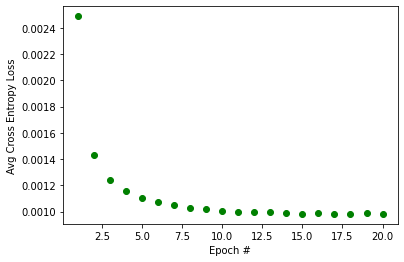

In [ ]:
# Set number of epochs
NUM_EPOCHS = 20

# Initialize model using CPU
mlp_on_cpu = MLP(size_input,Input_layer_size,size_hidden1,size_hidden2,size_output,m_t, v_t, u_t,device='none')

time_start = time.time()

for epoch in range(NUM_EPOCHS):
    
  loss_total = tf.zeros([1,1], dtype=tf.float32)
  lt = 0
    
  train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(25, seed=epoch*(5080)).batch(128)
  kz = 0
  accuracy_z = 0.0
  cur_train_acc = 0.0
  for inputs, outputs in train_ds:
    qw, tr = tf.shape(inputs)
    kz = kz + 1
    preds = mlp_on_cpu.forward(inputs) 
    loss_total = loss_total + mlp_on_cpu.loss(preds, outputs)
    lt = lt + mlp_on_cpu.loss(preds, outputs)
    mlp_on_cpu.backward(inputs, outputs, epoch)

  preds = mlp_on_cpu.forward(X_train)
  # Get probs, remember we only have logits from our forward function, we need to apply softmax on top of it to get probs
  preds = tf.nn.softmax(preds)
  correct_prediction = tf.equal(tf.argmax(preds, 1), tf.argmax(y_train, 1))
  accuracy_z = accuracy_z + tf.reduce_mean(tf.cast(correct_prediction, "float"))
  cur_train_acc += accuracy_z.numpy()
  ds = cur_train_acc
  print('\nTrain Accuracy: {:.4f}'.format(ds))
  print('Number of Epoch = {} - Average Cross Entropy:= {} '.format(epoch + 1, np.sum(loss_total) / X_train.shape[0]))
  preds_val = mlp_on_cpu.forward(X_val)
  preds_val = tf.nn.softmax(preds_val)
  correct_prediction = tf.equal(tf.argmax(preds_val, 1), tf.argmax(y_val, 1))

  # Calculate accuracy
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
  cur_val_acc = accuracy.numpy()

  print('\nValidation Accuracy: {:.4f}'.format(cur_val_acc))
  
  plt.plot(epoch + 1, np.sum(loss_total) / X_train.shape[0], 'go')
  plt.xlabel('Epoch #')
  plt.ylabel('Avg Cross Entropy Loss')
        
time_taken = time.time() - time_start
    
# Validate model
print('\nTotal time taken (in seconds): {:.2f}'.format(time_taken))

## One Step Inference: Testing

In [ ]:
# Initialize
test_loss_total = tf.Variable(0, dtype=tf.float32)
correct_prediction = tf.Variable(0, dtype=tf.float32)

test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(4)

for inputs, outputs in test_ds:
  preds = mlp_on_cpu.forward(inputs)
  test_loss_total = test_loss_total + mlp_on_cpu.loss(preds, outputs)
  standard_error = mlp_on_cpu.stderr(preds) # Standard error
  Variance = mlp_on_cpu.var(preds) # Variance
print('Test loss: {:.4f}'.format(np.sum(test_loss_total.numpy()) / X_test.shape[0]))

# Test model
preds_test = mlp_on_cpu.forward(X_test)
preds_test = tf.nn.softmax(preds_test)
correct_prediction = tf.equal(tf.argmax(preds_test, 1), tf.argmax(y_test, 1))

# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
cur_test_acc = accuracy.numpy()
print('\nTest Accuracy: {:.2f}'.format(cur_test_acc))

# Print
print('Test standard error: {:.4f}'.format(standard_error))
print('Test variance: {:.4f}'.format(Variance))

Test loss: 0.0344

Test Accuracy: 0.96
Test standard error: 1.9606
Test variance: 15.3756
